# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [30]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

df = pd.read_csv('database/games.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [31]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Что касается измения типов данных, то изменю тип в year_of_release, critic_score на int

Просмотри количества пропущенных значений 

In [32]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [33]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Что касается пропусков в *year_of_release*, то тут всего 1.6% пропусков, и какой-то правильного заполнения пропусков я не вижу. Можно руками конечно пройтись по данным, но считаю нет необходимости, поэтому оставим. Что касается типа данных, изменим их

In [34]:
df.Critic_Score.value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: Critic_Score, Length: 82, dtype: int64

# Шаг 2. Подготовьте данные

Переименовываю названия колонок в нижний контикул

In [35]:
df.columns = df.columns.str.lower()

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Изменение типа в year_of_release и в critic_score

In [36]:
df['year_of_release'] = df['year_of_release'].astype('Int32')
df['critic_score'] = df['critic_score'].astype('Int32')
df.year_of_release.value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

Посмотрим что в user_score

In [37]:
df.user_score.value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Есть значение tbd, что значит **to be discussed**, и по сути значение пустое, поэтому я бы заменил на пропущенное значение, и изменил бы тип на float

In [38]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = None
#df['user_score'].replace(to_replace='tbd', value=None)

df['user_score'] = df['user_score'].astype('float64')
df.user_score.value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int32  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int32(2), float64(5), object(4)
memory usage: 1.3+ MB


Все что касается остальных пропусков, то я не думаю, что ин необходимо заполнять, ибо данные могут исказиться 

Создадим дополнительную колонку с общим доходом со всех регионов

In [40]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [41]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


# Шаг 3. Исследовательский анализ данных

## Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрим сколько игр выпускалось на разные платформы в зависимости от времени

In [42]:
pivot_df = pd.pivot_table(df, index='year_of_release', columns='platform', values='name', aggfunc='count')
fig = px.line(pivot_df)
fig.show()

Построим график продаж по платформам в зависимости от времени

In [43]:
pivot_df = pd.pivot_table(df, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

fig = px.line(pivot_df)
fig.show()

In [44]:
pivot_df = pd.pivot_table(df, index='year_of_release', columns='platform', values='critic_score', aggfunc='count')

fig = px.line(pivot_df)
fig.show()

In [45]:
pivot_df = pd.pivot_table(df, index='year_of_release', columns='platform', values='user_score', aggfunc='count')

fig = px.line(pivot_df)
fig.show()

Посмотрим на топ продоваемых платформ, хотя судя по графику это PS2, но подкрепим это цифрами

In [46]:
platform = df.groupby('platform')

In [47]:
platform_sales = {}
for i, k in platform:
    platform_sales[i] = k['total_sales'].sum()

plat_sales = pd.Series(platform_sales)

In [48]:
plat_sales.sort_values(ascending=False)

PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
dtype: float64

И правда PS2 оказалась по продажам больше всего

## Посмотрите, как менялись продажи по платформам. 

Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Рассчитаем время жизни каждой платформы.

In [49]:
platform_live = {}
for i, k in platform:
    platform_live[i] = k['year_of_release'].max() - k['year_of_release'].min()

plat = pd.Series(platform_live)
plat


2600     9
3DO      1
3DS      5
DC      10
DS      28
GB      13
GBA      7
GC       6
GEN      4
GG       0
N64      6
NES     11
NG       3
PC      31
PCFX     0
PS       9
PS2     11
PS3     10
PS4      3
PSP     11
PSV      5
SAT      5
SCD      1
SNES     9
TG16     0
WS       2
Wii     10
WiiU     4
X360    11
XB       8
XOne     3
dtype: int32

In [50]:
plat.mean()

7.612903225806452

## Возьмите данные за соответствующий актуальный период

Исходя из данных среднее время жизни платформы 7.6 лет, и в целом распределения по графикам, то я возьму данные с 2011 по 2016 год, так как распределения не сильно различаются, по отношению к другим годам

In [51]:
df_actual = df[df['year_of_release'] >= 2013]
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [52]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    Int32  
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int32(2), float64(6), object(4)
memory usage: 213.7+ KB


## Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Лидеры по продажам в актуальном периоде

In [53]:
pivot_df = pd.pivot_table(df_actual, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

fig = px.line(pivot_df)
fig.show()

In [54]:
df_actual.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

По прадажам лидирует PS3, правда судя по графику на конец 2016 года продажи падают, потому что вышло новое поколение ps4, и игры на Ps3 уже меньше делают. Так же xb360 в топе продаж, но к 2016 году доход так же падает. Если смотреть по истории, то как раз в 2016 году было прекращенно производство xb360, и выпущена новая серия.

## Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Построим "ящик с усами" по глобальный продажам в каждой платформе

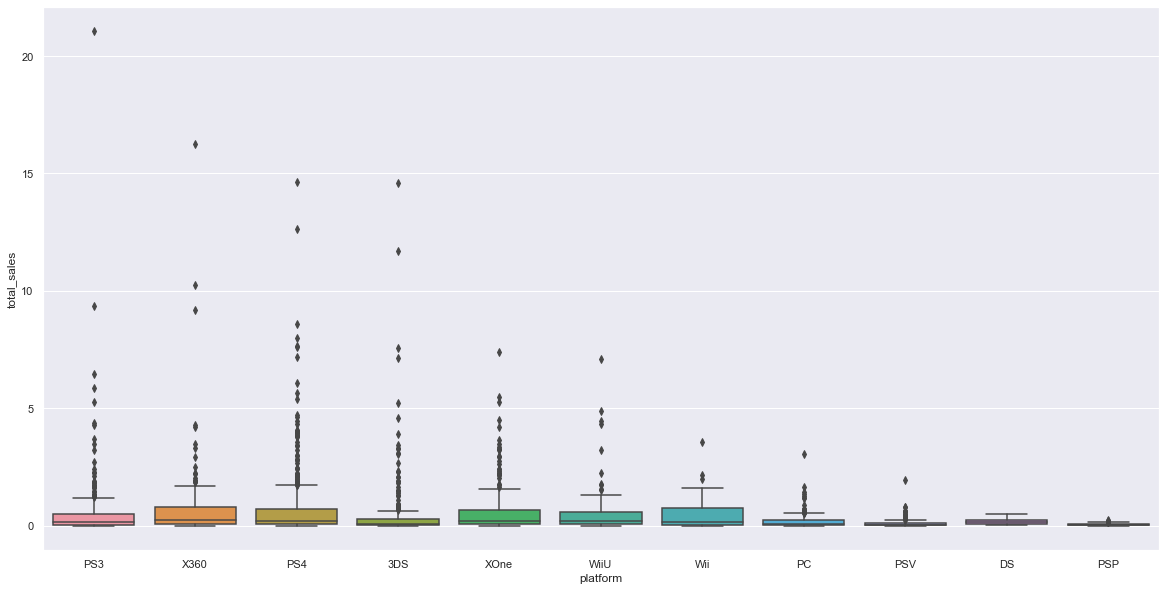

In [55]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x='platform', y='total_sales', data=df_actual);

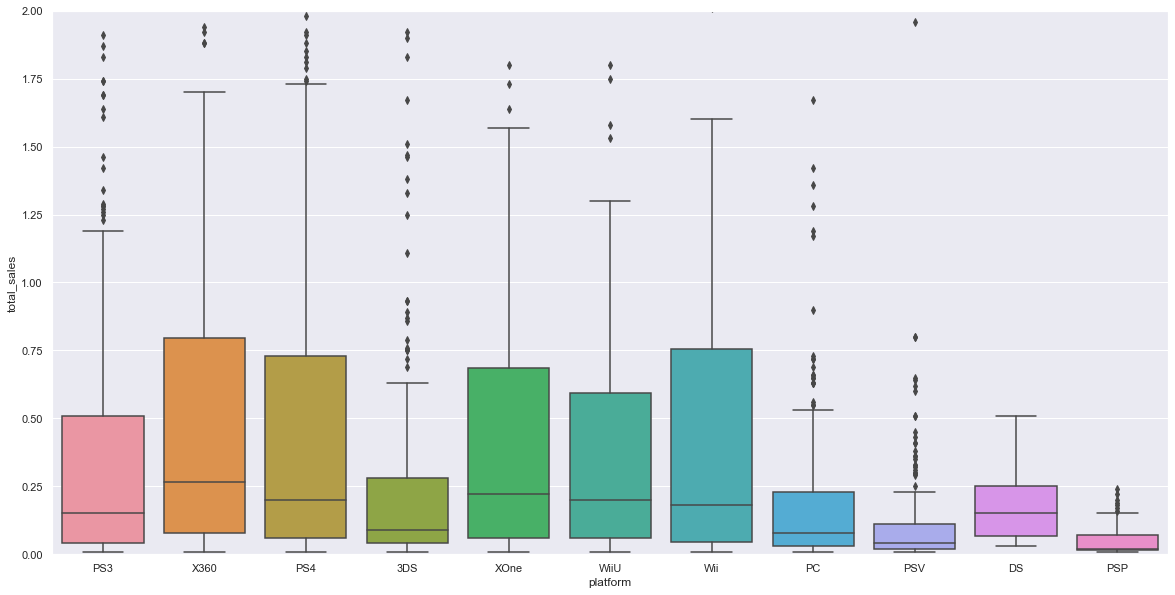

In [56]:
ax = sns.boxplot(x='platform', y='total_sales', data=df_actual)
plt.ylim(0, 2)
plt.show()

## Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

Возьмем одну популярную платформу. Я выберу PS3, и посмотрим как влияют на продажи отзывы критиков и пользователей.

In [57]:
df_actual_ps3 = df_actual[df_actual['platform'] == 'PS3']
df_actual_ps3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E,6.46
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95,9.1,M,5.86
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,<NA>,NaN,NaN,5.27


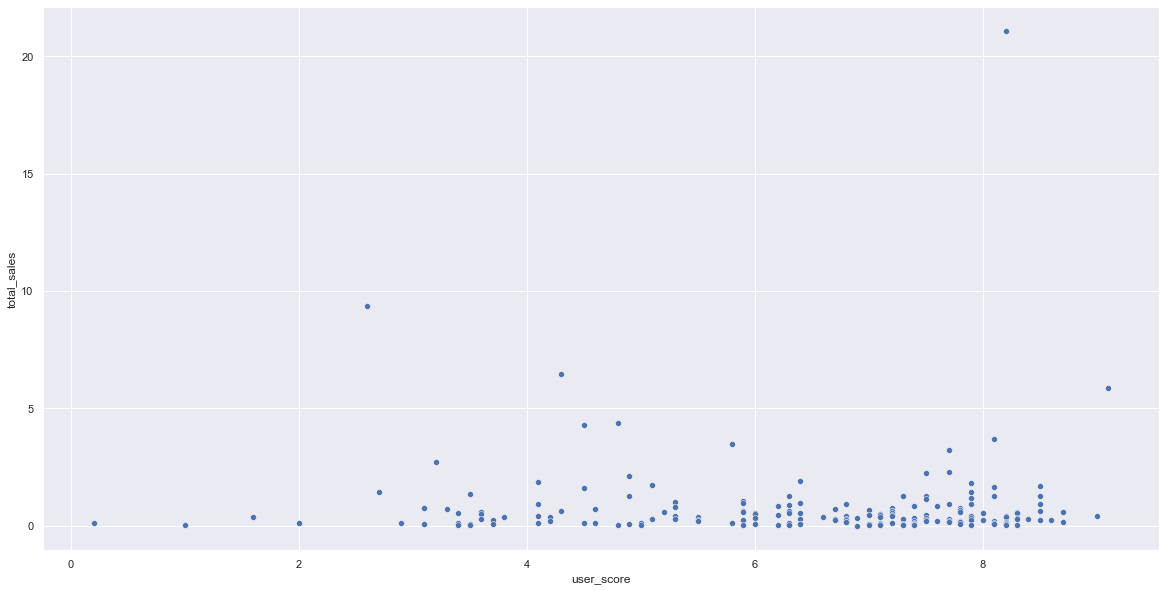

In [58]:
sns.scatterplot(x='user_score', y='total_sales', data=df_actual_ps3);

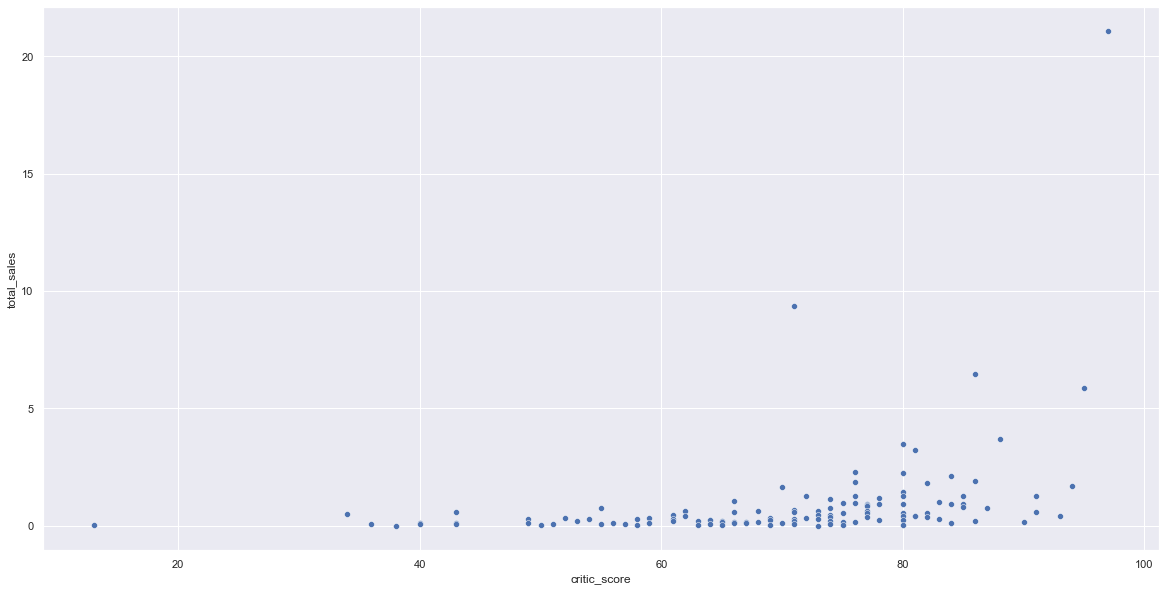

In [59]:
sns.scatterplot(x='critic_score', y='total_sales', data=df_actual_ps3);

Судя по диаграмме рассеянья становится ясно, что чем выше оценка критиков, тем больше люди к ним прислушиваются и покупают игру, тем самым увеличивают продажи. Но вот оценка пользователей не говорит о том, что чем больше рейтинг игры от людей, тем больше продажи. Моё предположение, что как раз большое влияние на продажность игры зависит от критиков, нежели чем от пользователей. Но давайте так же построим корреляцию

In [60]:
df_actual_ps3[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.599920,0.334285
user_score,0.599920,1.000000,0.002394
total_sales,0.334285,0.002394,1.000000


Корреляция по Пирсону так же нам подтверждает, что продажи зависимы от оценки критиков, но никак не зависят от оценки пользователей

## Соотнесите выводы с продажами игр на других платформах.

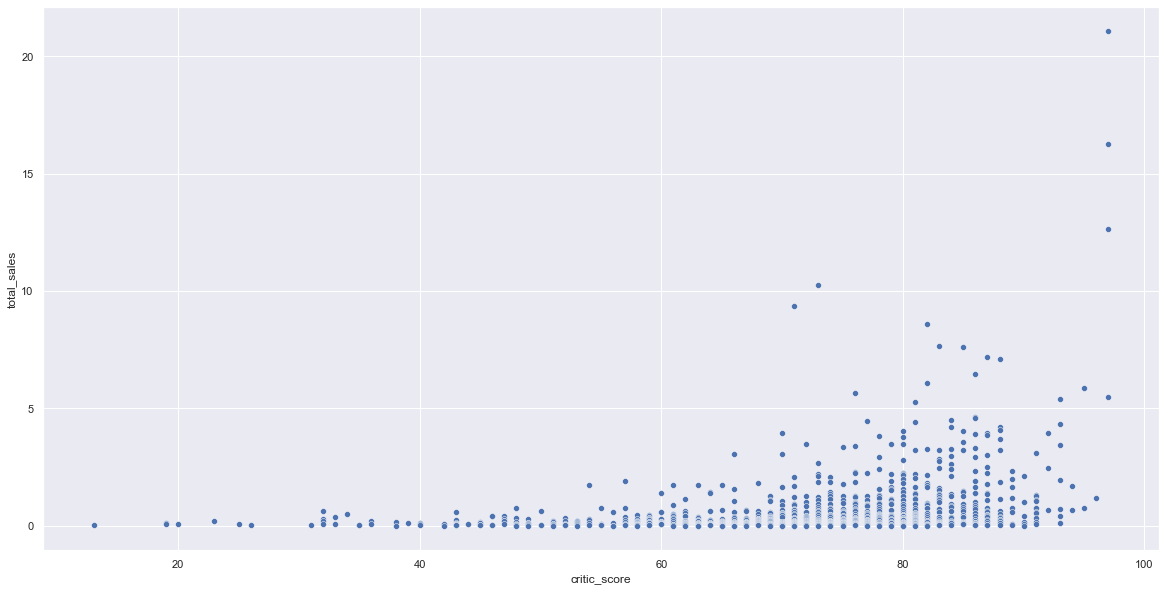

In [61]:
sns.scatterplot(x='critic_score', y='total_sales', data=df_actual);

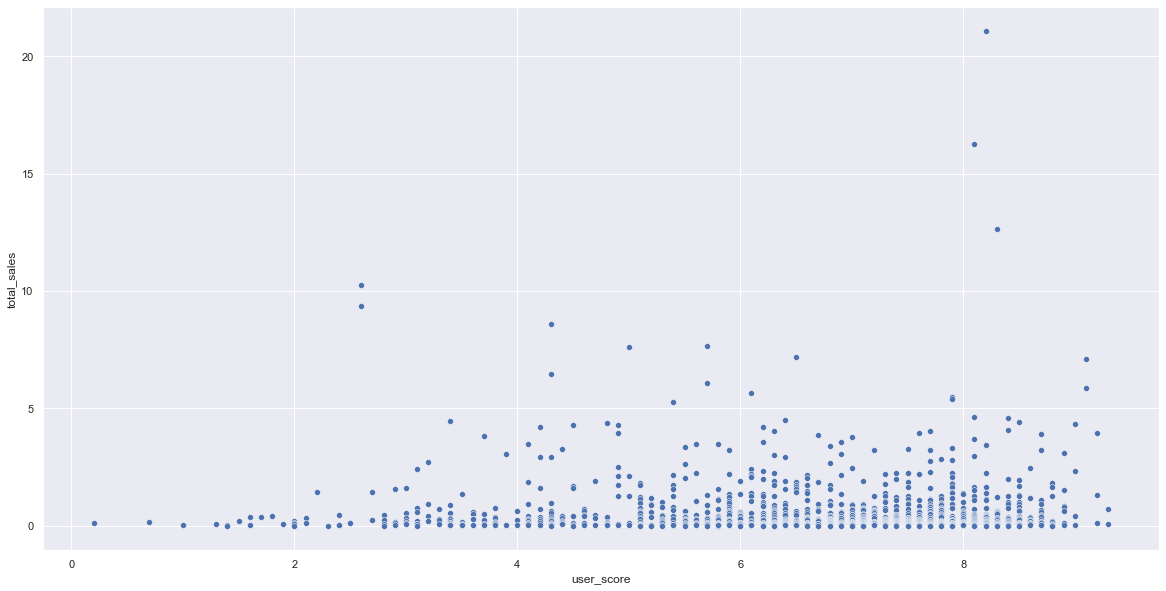

In [62]:
sns.scatterplot(x='user_score', y='total_sales', data=df_actual);

In [63]:
df_actual[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.502221,0.313700
user_score,0.502221,1.000000,-0.002608
total_sales,0.313700,-0.002608,1.000000


В общих данных корреляция еще меньше чем в PS3, но сути дела не меняет, что оценки критиков больше влияют на продажи чем оценки пользователей

## Посмотрите на общее распределение игр по жанрам.

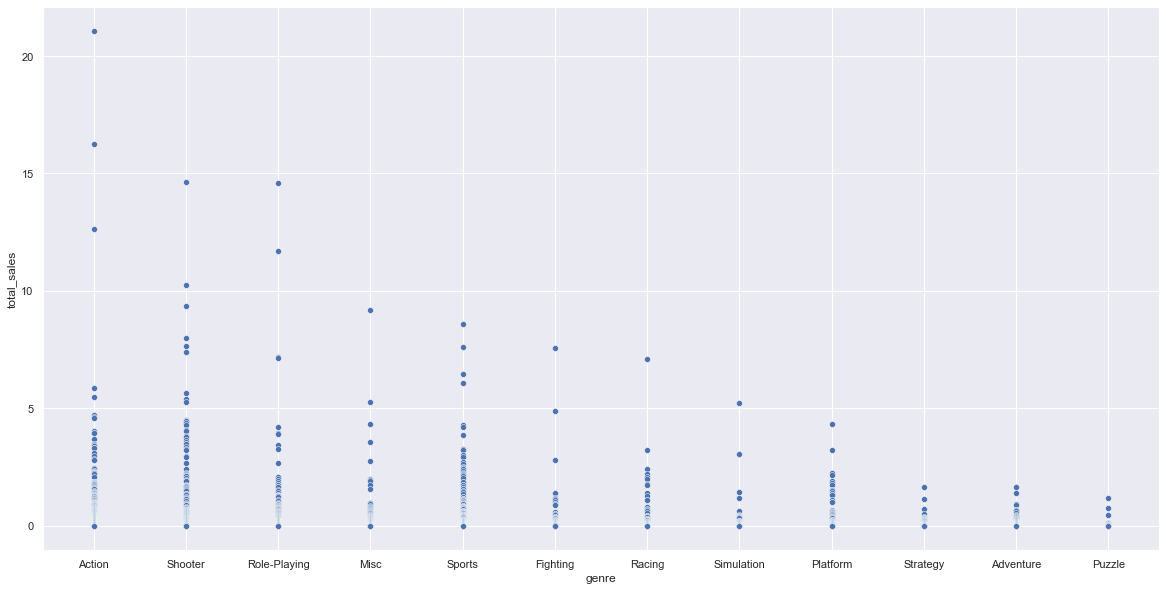

In [64]:
sns.scatterplot(x='genre', y='total_sales', data=df_actual);

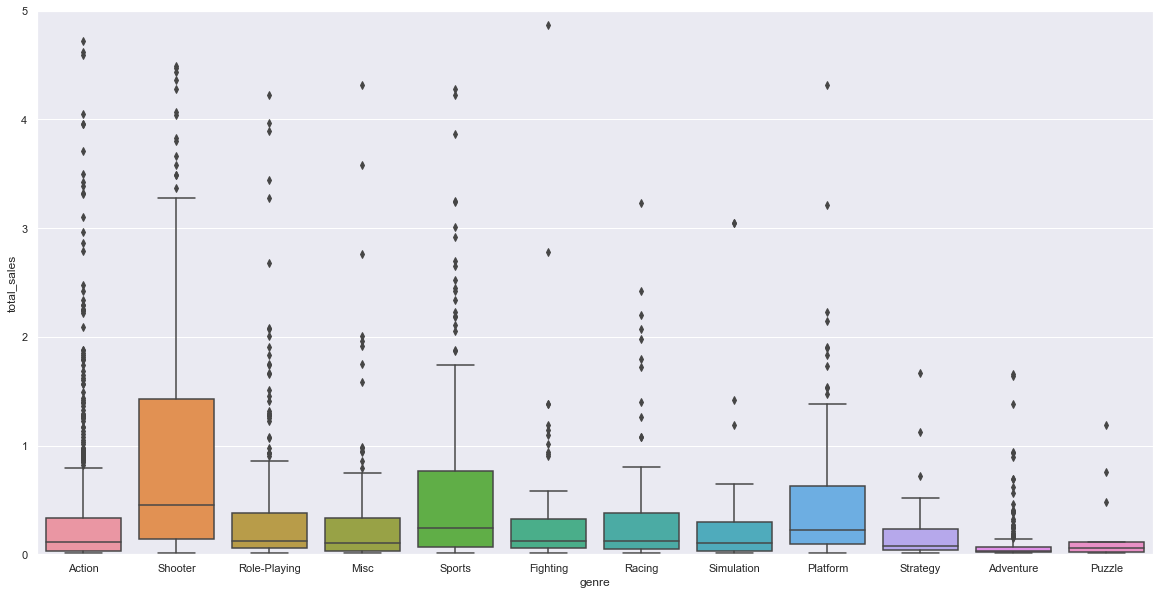

In [65]:
ax = sns.boxplot(x='genre', y='total_sales', data=df_actual)
plt.ylim(0, 5)
plt.show()

In [66]:
df_actual['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

По жанрам можно сказать, что самый популярный жанр это Action, и так же по продажам он лидирует, но интересно что Shooter в середине списка по количеству игр, но вот количество проданных копий на втором месте. В целом зависимость от количества игр и проданных копий есть

In [67]:
df_actual.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.499623
Racing          0.469294
Fighting        0.441375
Action          0.420196
Misc            0.405290
Simulation      0.350968
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096490
Name: total_sales, dtype: float64

# Шаг 4. Портрет пользователя каждого региона

## Определите для пользователя каждого региона (NA, EU, JP)

### NA

In [68]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


fig = px.pie(df_actual, values='na_sales', names='genre', title='Самые популярные жанры')
fig.show()

In [69]:
#df_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').plot(kind='pie', subplots=True, figsize=(6, 6), #autopct='%1.f%%')
#plt.title("Доли 5 самых популярных Жанров игр в NA")
#plt.ylabel("")
#plt.show()

Из этого пирога видно, что самые популярные жанры это Action, Shooter, sports, Role-PLaying и  Misc

In [70]:
fig = px.pie(df_actual, values='na_sales', names='platform', title='Самые популярные платформы')
fig.show()

Что касается платформ, то в америке больше всего любят XBOX360, а потом уже PS3, PS4

### EU

In [71]:
fig = px.pie(df_actual, values='eu_sales', names='genre', title='Самые популярные жанры')
fig.show()

В европе похожее распределение по популярности жанров, за исключением Misc. Они тут немного уступают Racing.

In [72]:
fig = px.pie(df_actual, values='eu_sales', names='platform', title='Самые популярные платформы')
fig.show()

А вот по платформам тут больше предпочитают PS3, PS4, а так же в топ 5  входит PC

### JP

In [73]:
fig = px.pie(df_actual, values='jp_sales', names='genre', title='Самые популярные жанры')
fig.show()

А вот японский рынок больше всего предпочитает Role-Playing больше всего, а потом уже Action. Так же в топ входят платформеры и файтинги

In [74]:
fig = px.pie(df_actual, values='jp_sales', names='platform', title='Самые популярные платформы')
fig.show()

И платформы тут удивляют. Самая популярная 3DS, а xbox360 вообще не входят в топ 5. Могу предположить, что японцы всегда в дороге, и им важна портативность, судя по том как у них популярна PSP и PSV

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [75]:
df_actual.pivot_table(index='rating',
                 values=['eu_sales', 'jp_sales', 'na_sales'],
                 aggfunc=['mean', 'median'])


mean                       median                  
        eu_sales  jp_sales  na_sales eu_sales jp_sales na_sales
rating                                                         
E       0.276026  0.050132  0.261755    0.055     0.00     0.05
E10+    0.169405  0.023373  0.215238    0.100     0.00     0.12
M       0.393821  0.038238  0.447724    0.130     0.00     0.14
T       0.125976  0.061832  0.149520    0.040     0.01     0.04

Мне кажется что рейтинг ESRB влияет на продажи, так как в NA под рейтингом EC продажи игр есть, по отношению к другим. Хотя возможно и в регионах проосто нет игр с таким рейтингом. Странно еще наблюдать нулевое медианное значение по японии. В целом если смотреть по регионам, то мне кажется рейтинг ESRB влияет на продаваемость игры.

In [76]:
from matplotlib import pyplot as plt

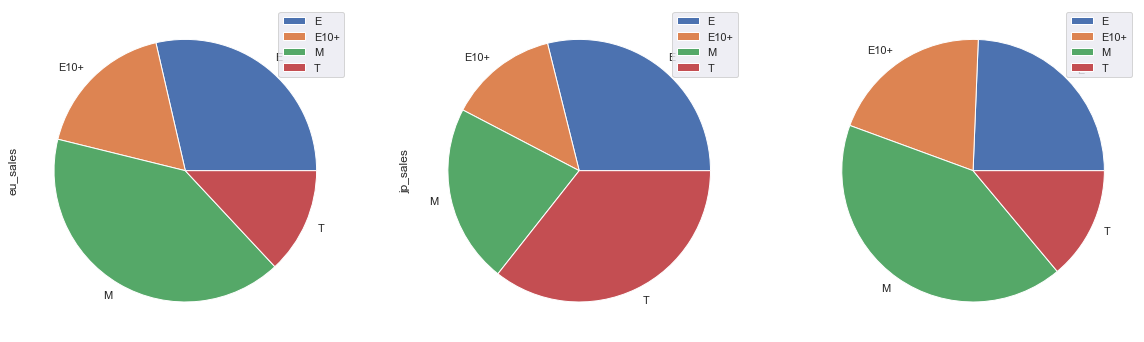

In [77]:
df_actual.pivot_table(index='rating', values=['eu_sales', 'jp_sales', 'na_sales'], aggfunc = 'mean').plot(kind='pie', subplots=True, figsize=(20, 20))
plt.ylabel("")
plt.show()

# Шаг 5. Проверка гипотез

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза:
Средние пользовательские рейтинги платформ Xbox One и PC разные
 

Так как нам не нужен очень точный прогноз, установим альфа в 5%. Использовать буду t-test двух независимых выборок. Так же установим, что дисперсии различаются.

In [78]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [79]:
df_actual_xbox = df_actual.query('platform == "XOne"').dropna()
df_actual_pc = df_actual.query('platform == "PC"').dropna()

In [80]:
alpha = .05

results = st.ttest_ind(
    df_actual_xbox['user_score'], 
    df_actual_pc['user_score'],
    equal_var=False
    )

print('p-значение:', results.pvalue ) 

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1410427529938314
Не получилось отвергнуть нулевую гипотезу


Итого получаем, что нулевую гипотезу отвергнуть не удалось, и получается, что средние рейтинги XboxOne и PC одинаковые

## Средние пользовательские рейтинги жанров Action  и Sports разные.

Нулевая гипотеза:
Средние пользовательские рейтинги жанров Action и Sports разные.

Альтернативная гипотеза:
Средние пользовательские рейтинги жанров Action и Sports равны.
 

Использовать буду так же t-test , так как выборки независимые. Так же установим, что дисперсии различаются.

In [81]:
df_actual_action = df_actual.query('genre == "Action"').dropna()
df_actual_sports = df_actual.query('genre == "Sports"').dropna()

In [82]:
alpha = .05

results = st.ttest_ind(
    df_actual_action['user_score'], 
    df_actual_sports['user_score'],
    equal_var=False
    )

print('p-значение:', results.pvalue ) 

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.136312729062867e-13
Отвергаем нулевую гипотезу


А тут оказывается что p-значение очень маленькое, что говорит нам о том что жанры Action и Sports могут быть одинаковыми

# Шаг 6. Общий вывод

Приходя к общему выводу, видно отличие как в жанрах, так и платформах в зависимости от региона, как в xbox преуспевает в сша, но ps3 переходящий в ps4 преуспевает в европе. А вот в японии любят портативные устройства, либо старенькие приставки. Так же стоит учитывать жанры игр. В европе и америке жанры схожи, но вот японцы любят pole-play игры, и на них стоит обращать внимание. 
Так же необходимо учитывать рецензии критиков, так как их слушают пользователи, и от них растут показатель продажи игр.
По проверке гипотез так же стало ясно, что оценка пользователей как от xbox и pc одинакова, так и от жанра action и sports